<a href="https://colab.research.google.com/github/MochNad/Pembelajaran-Mesin/blob/main/UTS_(Kelompok4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentasi Gambar dengan Clustering

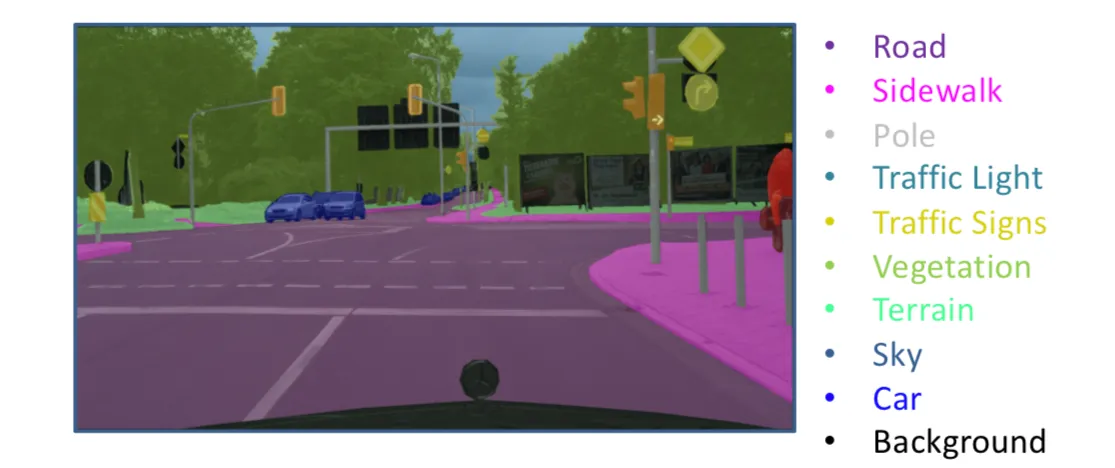

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

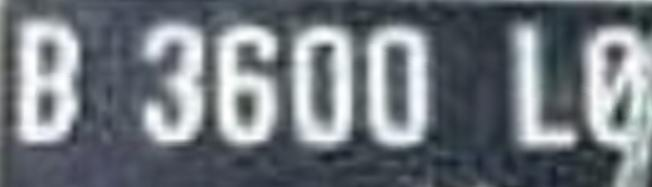

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

**Open Challange** (Opsional)
 - Bagaimana cara melakukan evaluasi pada hasil segementasi?
 - Terapkan pada kasus ini!


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

# Kode Bantuan

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

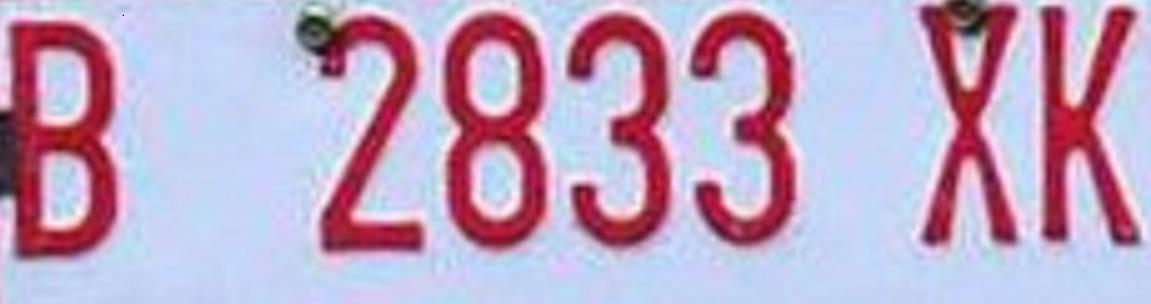

In [ ]:
# Load Gambar
img = cv2.imread('/content/sample_data/a.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img) # khusus google colab karena ada issue

In [ ]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

304
1151
3


In [ ]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(349904, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

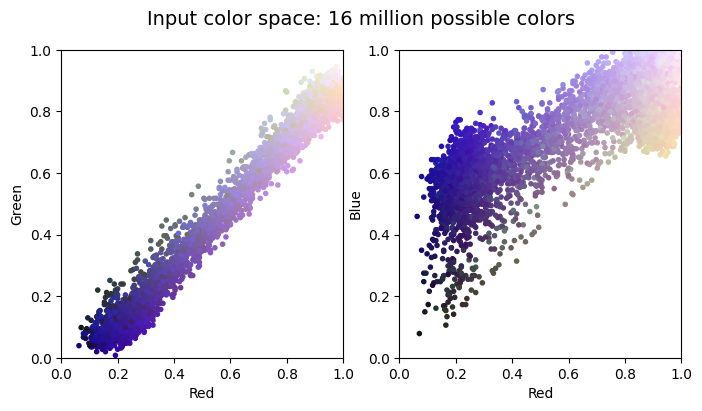

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [ ]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D (untuk K-Means)
citra_reshape = img.reshape((-1, 3))

# Tentukan jumlah klaster yang diinginkan
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Arahkan label klaster kembali ke bentuk asli
label_klaster = kmeans.labels_.reshape(img.shape[:2])

# Misalnya, Anda dapat menunjukkan klaster pertama (0) sebagai warna merah
citra_segmentasi = img.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]
citra_segmentasi[label_klaster == 1] = [255, 255, 255]

# Citra yang telah di-segmentasi tersimpan dalam citra_segmentasi

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Contoh Hasil Yang Diharapkan

Text(0.5, 1.0, '2-color Image')

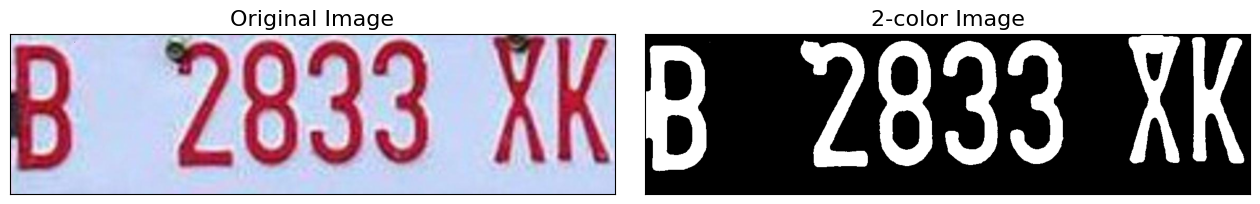

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

**Plat 1 - KMeans Clustering**

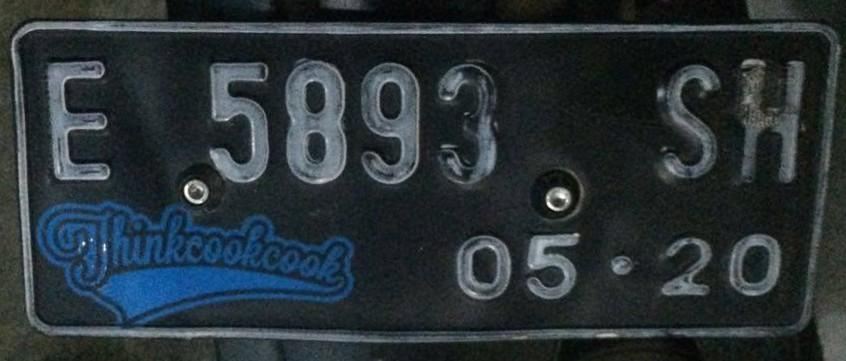

In [ ]:
# Load Gambar
img1 = cv2.imread('/content/sample_data/b.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img1) # khusus google colab karena ada issue

In [ ]:
h, w, ch= img1.shape
print(h)
print(w)
print(ch)

361
846
3


In [ ]:
data = img1 / 255.0
data = data.reshape(h * w, ch)
data.shape

(305406, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

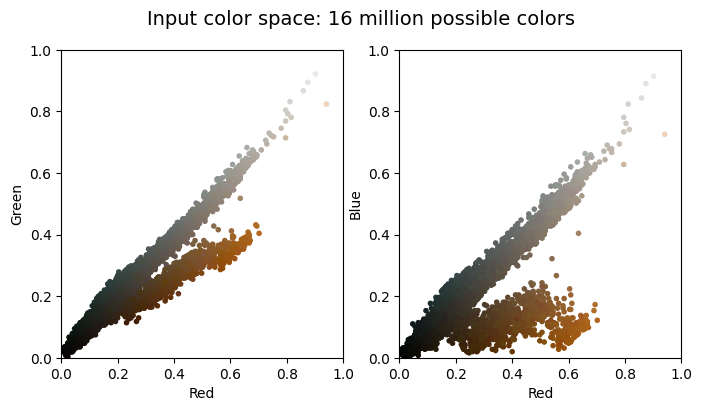

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [ ]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D (untuk K-Means)
citra_reshape = img1.reshape((-1, 3))

# Tentukan jumlah klaster yang diinginkan
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Arahkan label klaster kembali ke bentuk asli
label_klaster = kmeans.labels_.reshape(img1.shape[:2])

# Misalnya, Anda dapat menunjukkan klaster pertama (0) sebagai warna merah
citra_segmentasi = img1.copy()
citra_segmentasi[label_klaster == 0] = [255, 255, 255]
citra_segmentasi[label_klaster == 1] = [0, 0, 0]


# Citra yang telah di-segmentasi tersimpan dalam citra_segmentasi

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

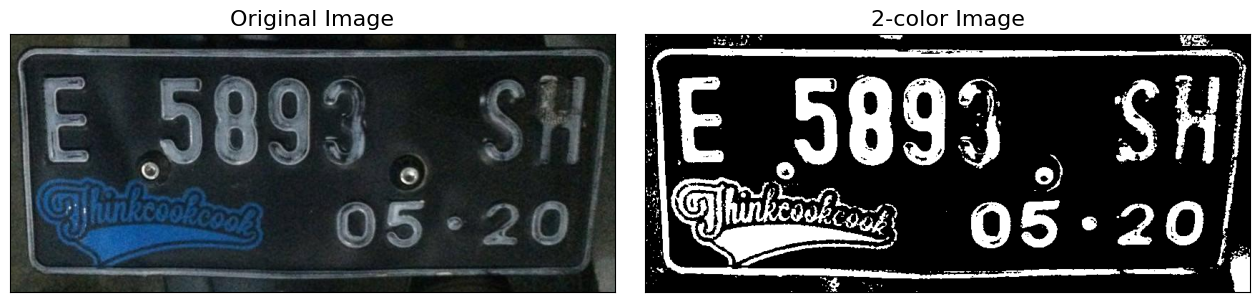

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

**Plat 2 - KMeans Clustering**

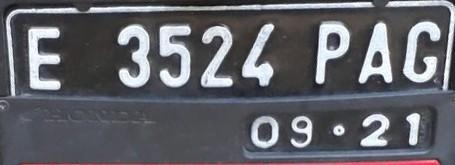

In [ ]:
# Load Gambar
img2 = cv2.imread('/content/sample_data/c.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img2) # khusus google colab karena ada issue

In [ ]:
h, w, ch= img2.shape
print(h)
print(w)
print(ch)

165
455
3


In [ ]:
data = img2 / 255.0
data = data.reshape(h * w, ch)
data.shape

(75075, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

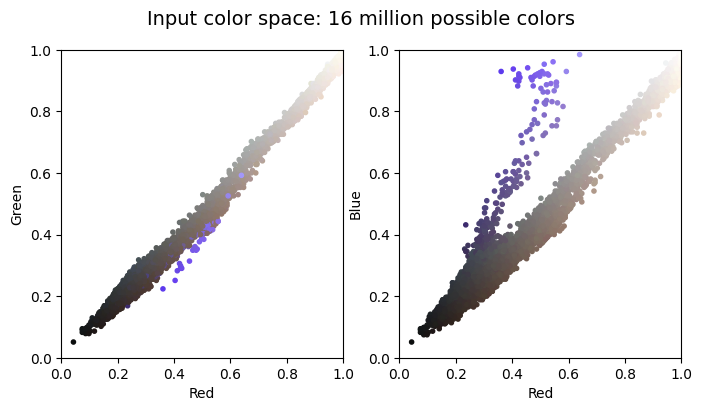

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [ ]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D (untuk K-Means)
citra_reshape = img2.reshape((-1, 3))

# Tentukan jumlah klaster yang diinginkan
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Arahkan label klaster kembali ke bentuk asli
label_klaster = kmeans.labels_.reshape(img2.shape[:2])

# Misalnya, Anda dapat menunjukkan klaster pertama (0) sebagai warna merah
citra_segmentasi = img2.copy()
citra_segmentasi[label_klaster == 0] = [255, 255, 255]
citra_segmentasi[label_klaster == 1] = [0, 0, 0]

# Citra yang telah di-segmentasi tersimpan dalam citra_segmentasi

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

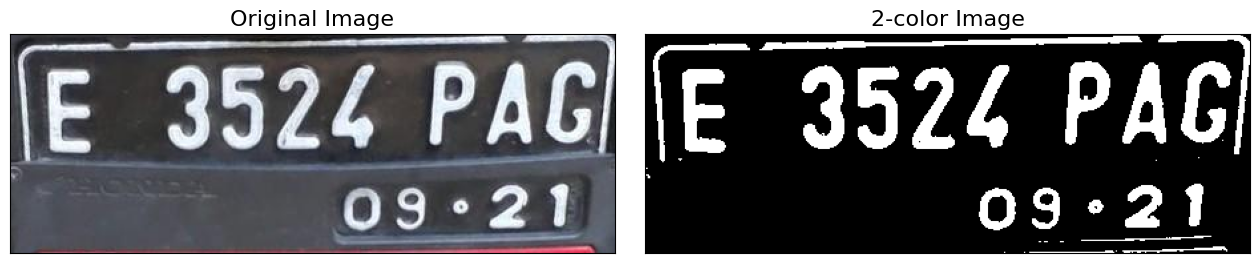

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

**Plat 3 - KMeans Clustering**

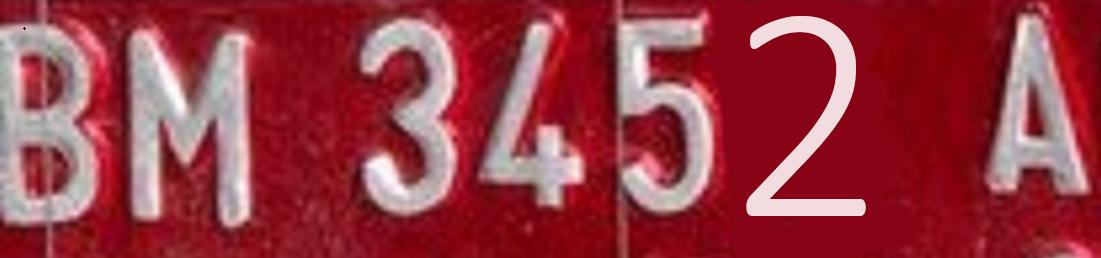

In [ ]:
# Load Gambar
img3 = cv2.imread('/content/sample_data/d.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img3) # khusus google colab karena ada issue

In [ ]:
h, w, ch= img3.shape
print(h)
print(w)
print(ch)

258
1101
3


In [ ]:
data = img3 / 255.0
data = data.reshape(h * w, ch)
data.shape

(284058, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

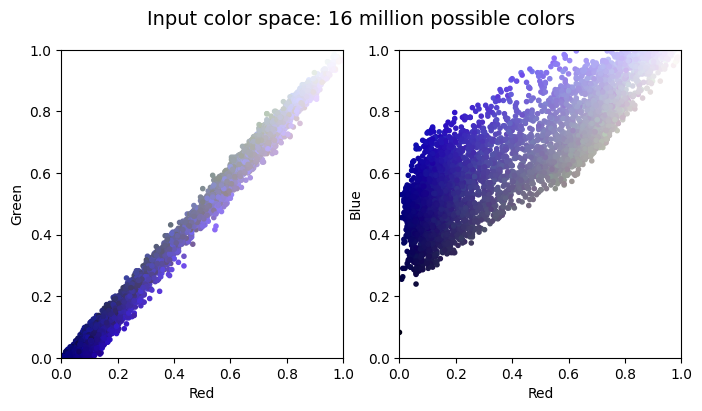

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [ ]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D (untuk K-Means)
citra_reshape = img3.reshape((-1, 3))

# Tentukan jumlah klaster yang diinginkan
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Arahkan label klaster kembali ke bentuk asli
label_klaster = kmeans.labels_.reshape(img3.shape[:2])

# Misalnya, Anda dapat menunjukkan klaster pertama (0) sebagai warna merah
citra_segmentasi = img3.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]
citra_segmentasi[label_klaster == 1] = [255, 255, 255]

# Citra yang telah di-segmentasi tersimpan dalam citra_segmentasi

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

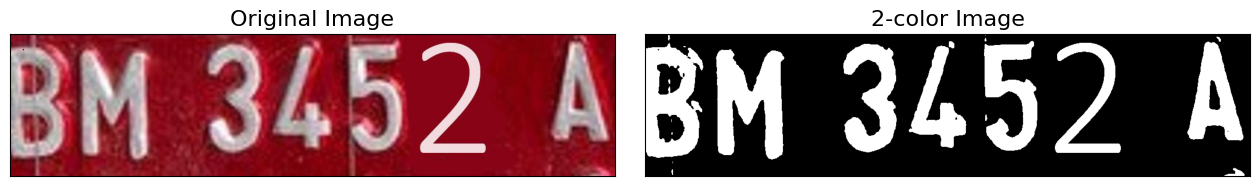

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

**Plat 4 - Fuzzy C Means Clustering**

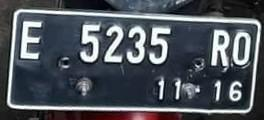

In [ ]:
# Load Gambar
img4 = cv2.imread('/content/sample_data/e.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img4) # khusus google colab karena ada issue

In [ ]:
h, w, ch= img4.shape
print(h)
print(w)
print(ch)

120
264
3


In [ ]:
data = img4 / 255.0
data = data.reshape(h * w, ch)
data.shape

(31680, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

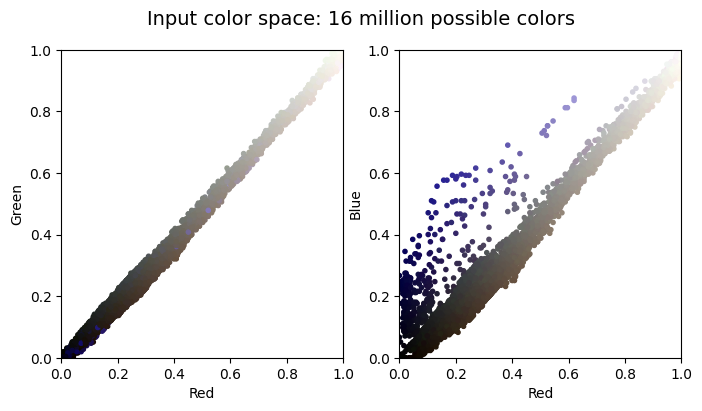

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [ ]:
# Baca citra
img4 = cv2.imread('/content/sample_data/e.jpg')

# Konversi citra ke ruang warna yang sesuai (misalnya, BGR ke RGB)
image_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

# Konversi citra ke bentuk array piksel
citra_reshape = image_rgb.reshape((-1, 3))
citra_reshape = np.float32(citra_reshape)

# Tentukan parameter FCM
jumlah_klaster = 2  # Jumlah cluster
fcm_criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Terapkan FCM Clustering
retval, labels, centers = cv2.kmeans(citra_reshape, jumlah_klaster, None, fcm_criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

cluster_colors = np.array([
    [0, 0, 0],
    [255, 255, 255]
])

# Konversi kembali ke citra asli
citra_segmentasi = cluster_colors[labels.flatten()].reshape(image_rgb.shape)

Text(0.5, 1.0, '2-color Image')

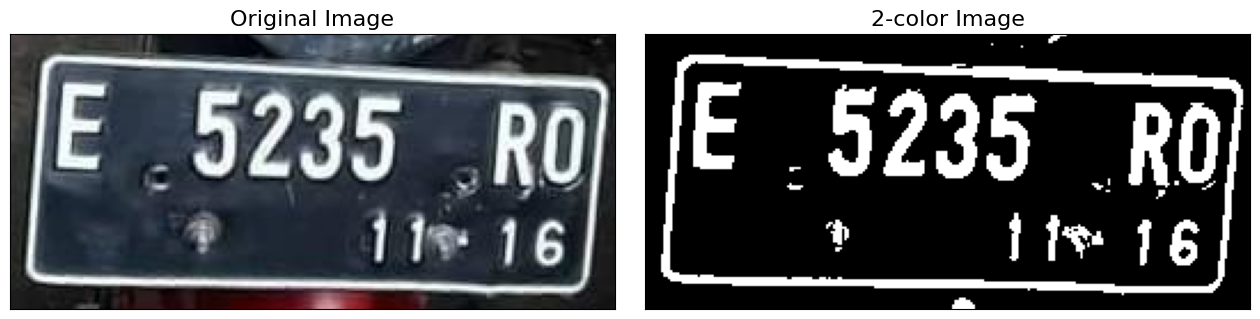

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(image_rgb)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(citra_segmentasi)
ax[1].set_title('2-color Image', size=16)

**Plat 5 - Fuzzy C Means Clustering**

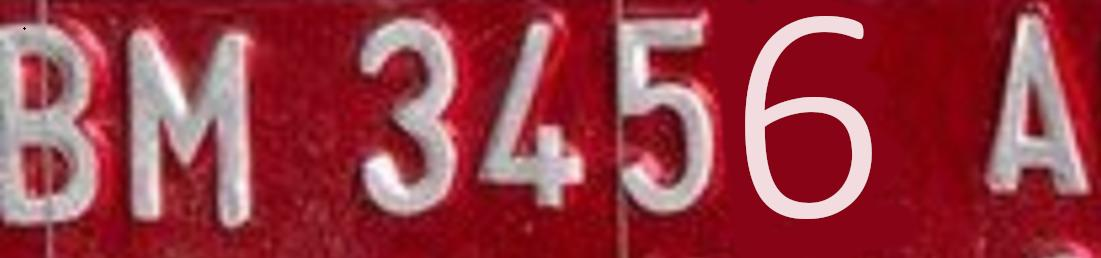

In [ ]:
# Load Gambar
img5 = cv2.imread('/content/sample_data/f.jpg')  # Memuat gambar 'f.jpg' dari direktori '/content/sample_data/'

# Tampilkan gambar
# cv2.imshow(img)  # Metode yang biasa digunakan untuk menampilkan gambar, tapi tidak cocok untuk Google Colab
cv2_imshow(img5)  # Menampilkan gambar 'img5' menggunakan cv2_imshow (khusus untuk Google Colab karena ada issue)

In [ ]:
h, w, ch = img5.shape  # Mendapatkan tinggi (h), lebar (w), dan jumlah saluran warna (ch) dari gambar 'img5'
print(h)  # Mencetak tinggi gambar
print(w)  # Mencetak lebar gambar
print(ch)  # Mencetak jumlah saluran warna (misalnya, 3 untuk gambar berwarna atau 1 untuk gambar grayscale)

258
1101
3


In [ ]:
data = img5 / 255.0  # Mengubah intensitas piksel gambar menjadi nilai antara 0 dan 1 (normalisasi)
data = data.reshape(h * w, ch)  # Mengubah bentuk data menjadi array 2D dengan baris h*w dan kolom ch
data.shape  # Mencetak bentuk (shape) data setelah proses normalisasi dan reshaping

(284058, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Memeriksa apakah 'colors' telah diberikan. Jika tidak, 'colors' akan diatur sama dengan 'data'.
    # Ini memungkinkan Anda untuk menentukan palet warna yang berbeda jika perlu.

    # Memilih subset acak sebanyak 'N' dari data
    rng = np.random.RandomState(0)  # Menghasilkan generator nomor acak dengan seed 0
    i = rng.permutation(data.shape[0])[:N]  # Mengambil indeks sebanyak 'N' secara acak dari data
    colors = colors[i]  # Memilih warna yang sesuai dengan indeks yang telah dipilih
    R, G, B = data[i].T  # Memisahkan saluran warna Red, Green, dan Blue dari data yang telah dipilih

    # Membuat plot dengan dua subplot (1, 2) dengan ukuran (8, 4)
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))

    # Plot pertama menunjukkan sebaran antara Red dan Green
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    # Plot kedua menunjukkan sebaran antara Red dan Blue
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    # Menambahkan judul gambar
    fig.suptitle(title, size=14)

# Fungsi ini dapat digunakan untuk memvisualisasikan data piksel dalam warna RGB dari gambar.

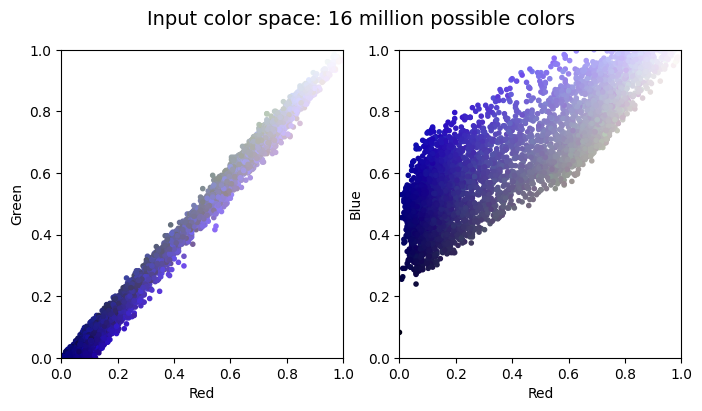

In [ ]:
# Memanggil fungsi plot_pixels untuk memvisualisasikan data warna
# dengan judul "Input color space: 16 million possible colors"
plot_pixels(data, title='Input color space: 16 million possible colors')

In [ ]:
# Baca citra
img5 = cv2.imread('/content/sample_data/f.jpg')

# Konversi citra ke ruang warna yang sesuai (misalnya, BGR ke RGB)
image_rgb = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

# Konversi citra ke bentuk array piksel
citra_reshape = image_rgb.reshape((-1, 3))
citra_reshape = np.float32(citra_reshape)

# Tentukan parameter FCM
jumlah_klaster = 2  # Jumlah cluster
fcm_criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Terapkan FCM Clustering
retval, labels, centers = cv2.kmeans(citra_reshape, jumlah_klaster, None, fcm_criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

cluster_colors = np.array([
    [0, 0, 0],   # Warna cluster 1 (misalnya, hitam)
    [255, 255, 255]  # Warna cluster 2 (misalnya, putih)
])

# Konversi kembali ke citra asli
citra_segmentasi = cluster_colors[labels.flatten()].reshape(image_rgb.shape)

Text(0.5, 1.0, '2-color Image')

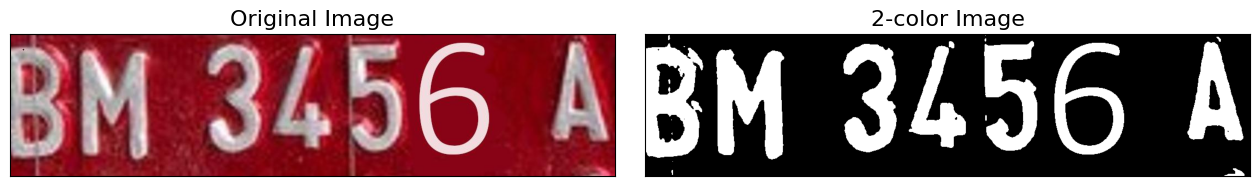

In [ ]:
# Membuat gambar (figure) dan dua subplot
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))

# Mengatur jarak antara kedua subplot
fig.subplots_adjust(wspace=0.05)

# Menampilkan citra asli pada subplot pertama
ax[0].imshow(image_rgb)
ax[0].set_title('Original Image', size=16)  # Menambahkan judul untuk subplot pertama

# Menampilkan citra hasil segmentasi pada subplot kedua
ax[1].imshow(citra_segmentasi)
ax[1].set_title('2-color Image', size=16)  # Menambahkan judul untuk subplot kedua